# BARG Data Visualization 

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud 
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saadz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [123]:
df  = pd.read_csv('finalDF.csv')

### Percentage of Postive : Negative reviews in the dataset

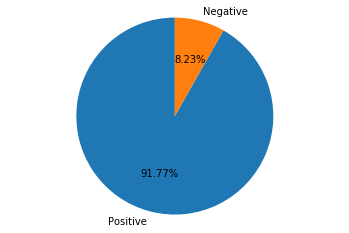

In [23]:
labels = 'Positive', 'Negative'
pos_count = df.query('SENTIMENT == "positive"').SENTIMENT.count()
neg_count = df.query('SENTIMENT == "negative"').SENTIMENT.count()
sizes = [pos_count, neg_count]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        startangle=90)
ax1.axis('equal')  

plt.show()

### Sentiment distribution in the dataset based on overall restaurant rating 

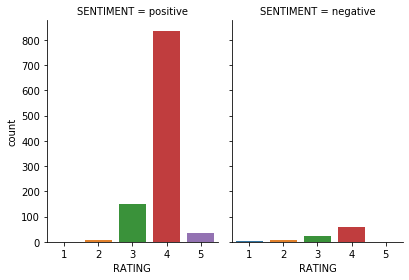

In [13]:
sentimentOverview = sns.catplot(x="RATING", col="SENTIMENT",

                data=df, kind="count",

                height=4, aspect=.7);

### Feature importance for Review Star Ratings

Feature: RATING, Score: 0.74
Feature: AVG_PRICE, Score: 0.26


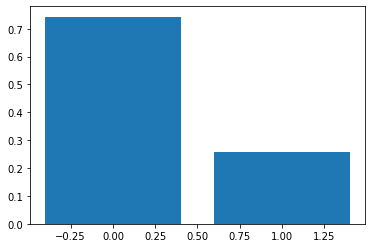

In [52]:
from sklearn.tree import DecisionTreeClassifier

x_array = df[["RATING", "AVG_PRICE"]].to_numpy()
y_array = df[["REVIEW_STARS"]].to_numpy()


X, y = x_array, y_array
model = DecisionTreeClassifier()
model.fit(X, y)

importance = model.feature_importances_


print('Feature: RATING, Score: %.2f' % importance[0])
print('Feature: AVG_PRICE, Score: %.2f' % importance[1])
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Features Correlating with Average Restaurant Rating

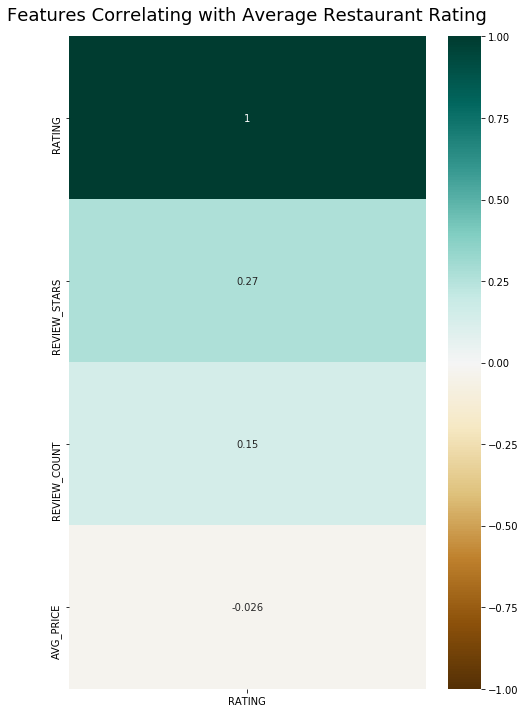

In [64]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df[['RATING','AVG_PRICE', 'REVIEW_COUNT', 'REVIEW_STARS']].corr()[['RATING']].sort_values(by='RATING', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Average Restaurant Rating', fontdict={'fontsize':18}, pad=16);

### Review sentiment counts by Restaurant category

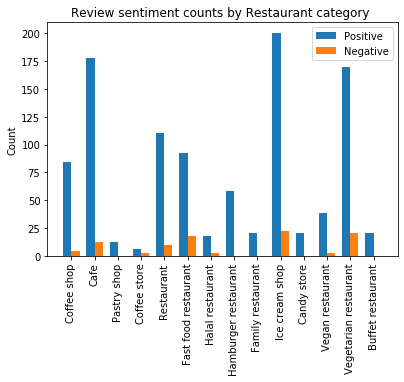

In [87]:
labels = list(df.CATEGORY.unique())

positive_reviews = []
negative_reviews = []

for label in labels:
    pos_count = ((df.SENTIMENT == 'positive') & (df.CATEGORY == label)).sum()
    neg_count = ((df.SENTIMENT == 'negative') & (df.CATEGORY == label)).sum()
    positive_reviews.append(pos_count)
    negative_reviews.append(neg_count)
    
x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, positive_reviews, width, label='Positive')
rects2 = ax.bar(x + width/2, negative_reviews, width, label='Negative')

ax.set_ylabel('Count')
ax.set_title('Review sentiment counts by Restaurant category')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

### Number of records by Restaurant Category

<BarContainer object of 14 artists>

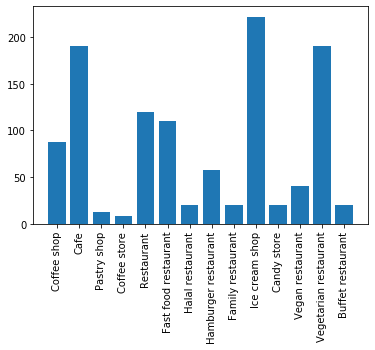

In [107]:
labels = list(df.CATEGORY.unique())
values = []
for label in labels:
    count = ((df.CATEGORY == label)).sum()
    values.append(count)
    
plt.xticks(rotation=90)
plt.bar(labels, values)


In [126]:
df = df[df['REVIEW'].notna()]

In [141]:
stop_words = stopwords.words('english')
new_stopwords = ["food", "drink", "experience", "price", "order", "taste", "service", "location",
                    "place", "restaurant", "pizza","burgers", "burger", "work", "buy", "staff", "ice", "coffee", "cream","piece", "...", ""]
stop_words.extend(new_stopwords)
stop_words = set(stop_words)
exclude_words = set(("not", "wouldn't", "don't", "don", "didn't", "doesn't", "wasn't", "won't", "won", "wouldn", "no", "isn't"))
new_stop_words = stop_words - exclude_words
stop_words = list(new_stop_words)

### Wordcloud for overall Positive Reviews

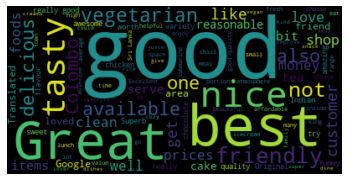

In [144]:
positive_reviews = df.query('SENTIMENT == "positive"').REVIEW

textt = " ".join(str(review) for review in positive_reviews)

wordcloud = WordCloud(stopwords=stop_words).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('positive_wordcloud.png')
plt.show()

### Wordcloud for overall negative reviews

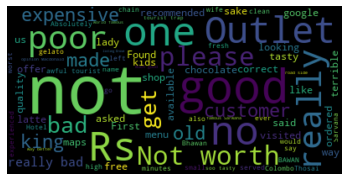

In [145]:
negative_reviews = df.query('SENTIMENT == "negative"').REVIEW

textt = " ".join(str(review) for review in negative_reviews)

wordcloud = WordCloud(stopwords=stop_words).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('negative_wordcloud.png')
plt.show()